[Link](https://www.kaggle.com/kendallgillies/nflstatistics)

This dataset focuses on various statistics on NFL players. It contains information on over 17,000 players, and shows how tall they are, their weight, what team they play for (if any), and where they went to college or high school. At first glance, it also seems very clean.

***Questions:***
* Is there a coorelation between a college football player's height and the amount of seasons they play for?
* Is there a coorelation between a college football player's weight and the amount of seasons they play for?
* Do any colleges produce more NFL players than others?
* What is the average weight and height of an NFL player?


In [25]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
df = pd.read_csv('./Basic_Stats.csv')
c = list(df.columns.values)

df.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN


In [39]:
def to_num(x):
    try:
        return int(x[0])
    except:
        return 0

df[c[6]] = df[c[6]].apply(lambda x: to_num(x))

# Print first 10 items to prove that the lambda did what I wanted
df[c[6]][0:10]

0    3
1    1
2    1
3    5
4    3
5    1
6    3
7    0
8    1
9    1
Name: Experience, dtype: int64

In [40]:
# Change all weights under 50 lbs to NaN's
df.loc[df[c[14]] < 50, c[13]] = np.NaN

# Print first 10 items
df[c[14]][0:10]

0    185.0
1    235.0
2    230.0
3    255.0
4    305.0
5    180.0
6    185.0
7    250.0
8      NaN
9    175.0
Name: Weight (lbs), dtype: float64

In [41]:
df = df.drop(['Number', 'Player Id', 'Position', 'High School Location'], axis=1)
df.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,Name,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3,71.0,NaN,"Evans, Fred",185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1,70.0,NaN,"Raiff, Jim",235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1,74.0,NaN,"Fowler, Bobby",230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5,73.0,NaN,"Johnson, Quinn",255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3,77.0,Clintondale HS,"Walton, L.T.",305.0,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 13 columns):
Age                13504 non-null float64
Birth Place        14794 non-null object
Birthday           16835 non-null object
College            17133 non-null object
Current Status     17172 non-null object
Current Team       3096 non-null object
Experience         17172 non-null int64
Height (inches)    17026 non-null float64
High School        2514 non-null object
Name               17172 non-null object
Weight (lbs)       17121 non-null float64
Years Played       14076 non-null object
Experince          17172 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 13 columns):
Age                13504 non-null float64
Birth Place        14794 non-null object
Birthday           16835 non-null object
College            17133 non-null object
Current Status     17172 non-null object
Current Team       3096 non-null object
Experience         17172 non-null int64
Height (inches)    17026 non-null float64
High School        2514 non-null object
Name               17172 non-null object
Weight (lbs)       17121 non-null float64
Years Played       14076 non-null object
Experince          17172 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.7+ MB


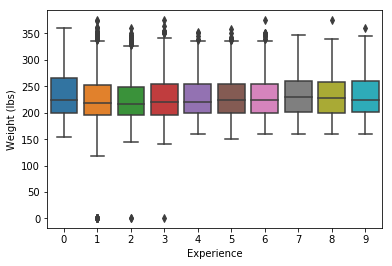

In [68]:
weight = df['Weight (lbs)'].dropna()
tmpdf = df
tmpdf['Weight (lbs)'] = weight

tmpdf.info()

sns.boxplot(x='Experience', y="Weight (lbs)", data=tmpdf)